In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import re
from fa2 import ForceAtlas2
from collections import Counter

## Exercise 1

In [2]:
df = pd.read_csv("/Users/yuesongyang/Desktop/Social_graphs/files/data_US_congress/H115.csv")

In [3]:
names=df.WikiPageName.tolist()
parties=df.Party.tolist()
states=df.State.tolist()
# wiki="https://en.wikipedia.org/wiki/"
# name_links=[wiki+name for name in names]

G=nx.DiGraph()
for i in range(len(names)):
    G.add_node(names[i], party = parties[i], state = states[i])

In [4]:
def getString(name):
    file = pickle.load(
        open( "/Users/yuesongyang/Desktop/Graph_exercise/115/" + name + ".pickle", 
             "rb"))
    try:
        res=file['pages'][[str(i) for i in file['pages'].keys()][0]]['revisions'][0]['*']
        return res
    except:
        print(name + " data not found")
        return ""
    
def getLinks(String):
    return re.findall("\[\[(.*?)\]\]",String)

def parseLink(links):
    res=[]
    for link in links:
        if '|' in link:
            index=link.index('|')
            res.append(link[:index])
            res.append(link[index+1:])
        else:
            res.append(link)
    return res

def pipe(target,Graph):
    String=getString(target)
    links=getLinks(String)
    parsedLinks=parseLink(links)
    for link in parsedLinks:
#         url = "https://en.wikipedia.org/wiki/" + link
#         result = requests.get(url)
        link_underscore=link.replace(" ","_")
        if link_underscore in names:
            Graph.add_edge(target , link_underscore)

In [5]:
for target in names:
    pipe(target,G)

Jerrold_Nadler data not found
Michael_F._Doyle data not found
Tim_Ryan_(politician) data not found
Joaquín_Castro data not found


## Exercise 2

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


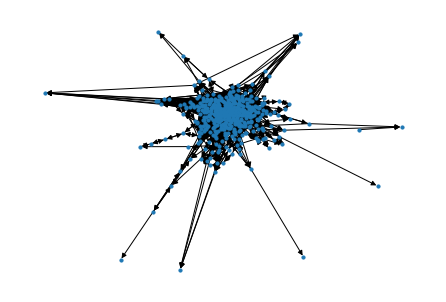

In [6]:
nx.draw_spring(G,node_size=10)

In [7]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0,

                        # Performance
                        jitterTolerance=0.0001,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.08,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.001,
                        strongGravityMode=False,
                        gravity=0,

                        # Log
                        verbose=False)

In [9]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None,iterations=10000)

KeyboardInterrupt: 

In [10]:
baseList=list(G.nodes(data=True))
color_list=[]
for node in baseList:
    if node[1]['party'] == 'Democratic':
        color_list.append("red")
    else:
        color_list.append("blue")
size_list=[x[1] for x in list(G.degree)]

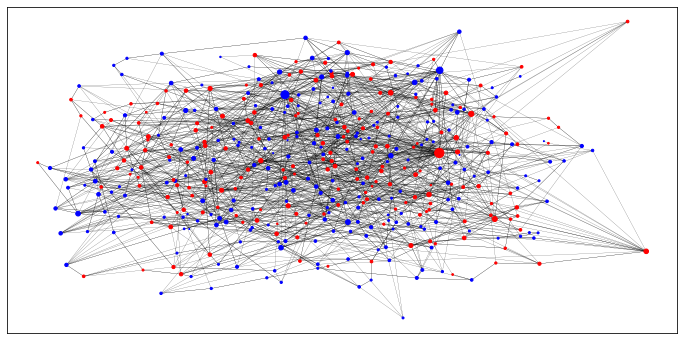

In [13]:
plt.rc('figure', figsize=(12, 6))
nx.draw_networkx(G, positions, 
        node_size=size_list, node_color=color_list,
        node_shape='o',
        width=0.15,
        arrows=False,
        with_labels=False)

In [11]:
G_non=G.to_undirected()

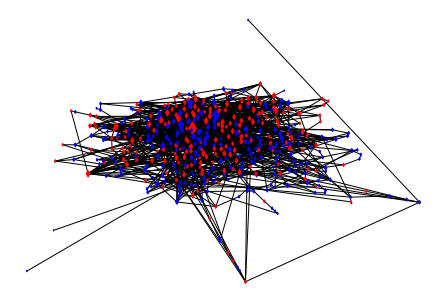

In [12]:
nx.draw(G_non, positions, 
        node_size=size_list, node_color=color_list,
        node_shape='d',
        with_labels=False)

## Exercise 3

In [13]:
sorted_out=sorted(list(G.out_degree),key=lambda x: x[1], reverse=True)

In [14]:
sorted_out[0]

('Kevin_McCarthy_(California_politician)', 19)

In [15]:
list(G.neighbors('Kevin_McCarthy_(California_politician)'))

['Steve_Scalise',
 'Nancy_Pelosi',
 'Steny_Hoyer',
 'Jim_Clyburn',
 'Jim_Jordan_(American_politician)',
 'Kevin_Yoder',
 'Pete_Sessions',
 'Jeb_Hensarling',
 'Cathy_McMorris_Rodgers',
 'Trey_Gowdy',
 'Dana_Rohrabacher',
 'Paul_Ryan',
 'Clay_Higgins',
 'John_Garamendi',
 'Jared_Huffman',
 'Mike_Thompson_(California_politician)',
 'Devin_Nunes',
 'Dave_Loebsack',
 'Jerry_McNerney']

Exercise 4: Begin to analyze the network of the house of representatives.

Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?
What is the total number of nodes in the network? What is the total number of links? The density of the network?
What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
List the top 5 politicians by in-degree and out-degree. What is their party and state? Do these politicians play a particular role in the house (see here)?
Plot the distribution of in-degrees and out-degrees, binned using numpy.histogram. What is the most common in-degree? The most common out-degree?
Plot the probability distribution of in-degrees and out-degrees one more time, this time plotted in loglog scale.
Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?
Plot a scatter plot of the the in- versus out- degree for all politicians. Comment on the relation between the two.
Plot a heatmap (Hint here) of the the in- versus out- degree for all politicians. What is the advantage of using a heatmap?

## Exercise 4

In [16]:
len(list(G.nodes))

445

In [17]:
len(list(G.edges))

1851

In [18]:
nx.density(G)

0.00936835712116611

In [19]:
pd.Series([x[1] for x in list(G.in_degree)]).describe()

count    445.000000
mean       4.159551
std        4.690817
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       71.000000
dtype: float64

In [20]:
pd.Series([x[1] for x in list(G.out_degree)]).describe()

count    445.000000
mean       4.159551
std        2.581846
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       19.000000
dtype: float64

In [21]:
in_top=sorted(list(G.in_degree),key=lambda x : x[1],reverse=True)[:5]
in_top

[('Nancy_Pelosi', 71),
 ('Paul_Ryan', 55),
 ('Kevin_McCarthy_(California_politician)', 23),
 ('Steny_Hoyer', 20),
 ('Keith_Ellison', 14)]

In [22]:
out_top=sorted(list(G.out_degree),key=lambda x : x[1],reverse=True)[:5]
out_top

[('Kevin_McCarthy_(California_politician)', 19),
 ('Ro_Khanna', 18),
 ('Nancy_Pelosi', 15),
 ('Cathy_McMorris_Rodgers', 13),
 ('Brad_Sherman', 12)]

In [23]:
for i in in_top:
    name=i[0]
    party=G.nodes[name]['party']
    print("{} is in {}".format(name,party))

Nancy_Pelosi is in Democratic
Paul_Ryan is in Republican
Kevin_McCarthy_(California_politician) is in Republican
Steny_Hoyer is in Democratic
Keith_Ellison is in Democratic


In [24]:
for i in out_top:
    name=i[0]
    party=G.nodes[name]['party']
    print("{} is in {}".format(name,party))

Kevin_McCarthy_(California_politician) is in Republican
Ro_Khanna is in Democratic
Nancy_Pelosi is in Democratic
Cathy_McMorris_Rodgers is in Republican
Brad_Sherman is in Democratic


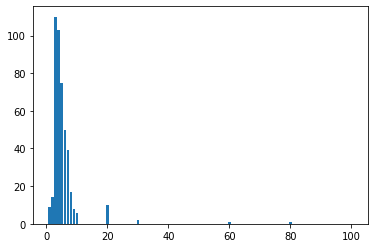

In [25]:
his=np.histogram([x[1] for x in list(G.in_degree)],
                 bins=[0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])
plt.bar(his[1][1:],height=his[0])
plt.show()

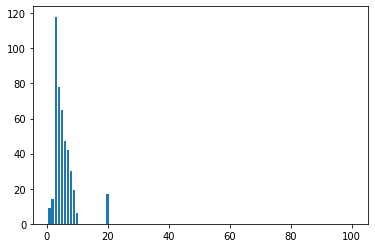

In [26]:
his=np.histogram([x[1] for x in list(G.out_degree)],
                 bins=[0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])
plt.bar(his[1][1:],height=his[0])
plt.show()

In [27]:
sorted(list(Counter([x[1] for x in list(G.in_degree)]).items()),
       key= lambda x : x[1],
       reverse=True)[0][0]

2

In [28]:
sorted(list(Counter([x[1] for x in list(G.out_degree)]).items()),
       key= lambda x : x[1],
       reverse=True)[0][0]

2

In [29]:
def ln(num):
    if num == 0:
        return 0
    else:
        return math.log(num)

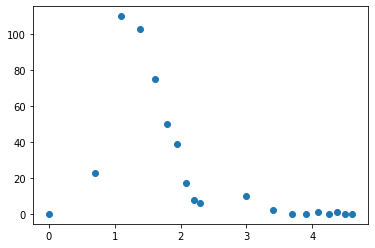

In [30]:
his=np.histogram(list(
    map(lambda x : ln(x), 
        [y[1] for y in list(G.in_degree)])),
                 bins=[ln(x) for x in [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]])
plt.scatter(x=his[1][1:],y=his[0])
plt.show()

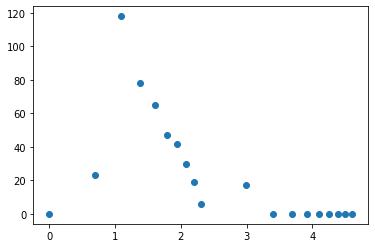

In [31]:
his=np.histogram(list(
    map(lambda x : ln(x), 
        [y[1] for y in list(G.out_degree)])),
                 bins=[ln(x) for x in [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]])
plt.scatter(x=his[1][1:],y=his[0])
plt.show()

In [35]:
out_list = [y[1] for y in list(G.out_degree)]
in_list= [y[1] for y in list(G.in_degree)]

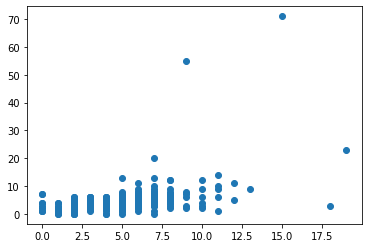

In [33]:
plt.scatter(x=out_list,y=in_list)
plt.show()

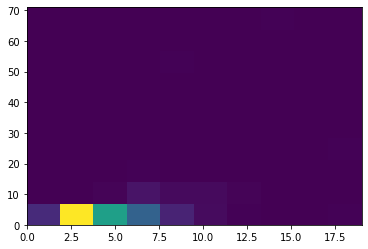

In [34]:
plt.hist2d(out_list,in_list)
plt.show()

## Exercise 5

In [39]:
G_non

In [65]:
sorted(list(nx.betweenness_centrality(G).items()),key = lambda x : x[1], reverse=True)[:5]

[('Nancy_Pelosi', 0.2146761535972679),
 ('Kevin_McCarthy_(California_politician)', 0.14545987038476443),
 ('Paul_Ryan', 0.10427646994941427),
 ('Devin_Nunes', 0.05854282492696506),
 ('Steny_Hoyer', 0.0441112751914587)]

In [68]:
# in-edge
sorted(list(nx.eigenvector_centrality(G).items()),key = lambda x : x[1], reverse=True)[:5]

[('Nancy_Pelosi', 0.42798018221799955),
 ('Paul_Ryan', 0.3608837148772771),
 ('Kevin_McCarthy_(California_politician)', 0.3290724318290403),
 ('Steny_Hoyer', 0.28305629479074335),
 ('Jim_Clyburn', 0.16381244466198025)]

In [69]:
# out-edge
sorted(list(nx.eigenvector_centrality(G.reverse()).items()),key = lambda x : x[1], reverse=True)[:5]

[('Kevin_McCarthy_(California_politician)', 0.2895536428529997),
 ('Jim_Clyburn', 0.1905905788371235),
 ('Devin_Nunes', 0.1884126089915566),
 ('Ro_Khanna', 0.17895926062006093),
 ('Steve_Scalise', 0.16254082724311755)]

In [70]:
between=list(nx.betweenness_centrality(G).items())
degree=list(nx.degree_centrality(G).items())

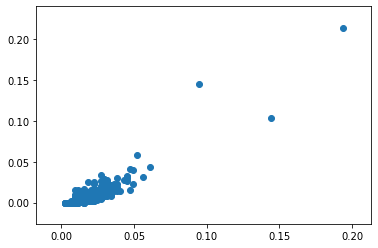

In [72]:
plt.scatter(y=[x[1] for x in between], x=[x[1] for x in degree])
plt.show()

In [73]:
np.corrcoef([x[1] for x in between],[x[1] for x in degree])

array([[1.        , 0.89937179],
       [0.89937179, 1.        ]])

[[1.         0.82258368]
 [0.82258368 1.        ]]


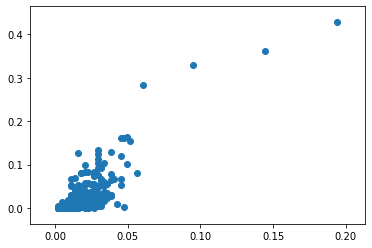

In [74]:
eigen=list(nx.eigenvector_centrality(G).items())
print(np.corrcoef([x[1] for x in eigen],[x[1] for x in degree]))
plt.scatter(y=[x[1] for x in eigen], x=[x[1] for x in degree])
plt.show()

[[1.         0.82602966]
 [0.82602966 1.        ]]


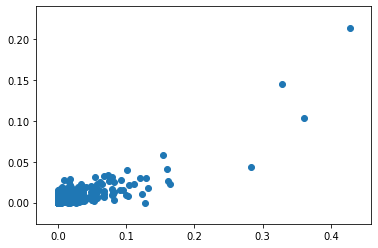

In [75]:
print(np.corrcoef([x[1] for x in between],[x[1] for x in eigen]))
plt.scatter(y=[x[1] for x in between], x=[x[1] for x in eigen])
plt.show()

[[1.         0.71805979]
 [0.71805979 1.        ]]


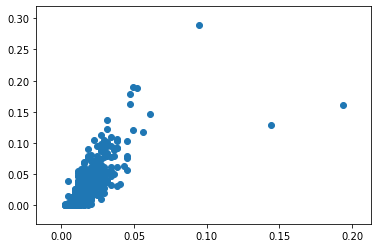

In [76]:
eigen_reverse=list(nx.eigenvector_centrality(G.reverse()).items())
print(np.corrcoef([x[1] for x in eigen_reverse],[x[1] for x in degree]))
plt.scatter(y=[x[1] for x in eigen_reverse], x=[x[1] for x in degree])
plt.show()

[[1.         0.60302938]
 [0.60302938 1.        ]]


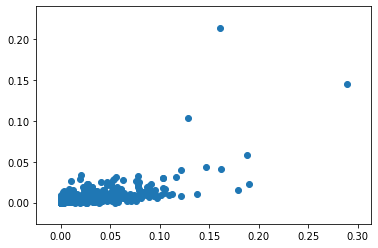

In [77]:
print(np.corrcoef([x[1] for x in between],[x[1] for x in eigen_reverse]))
plt.scatter(y=[x[1] for x in between], x=[x[1] for x in eigen_reverse])
plt.show()

In [78]:
nx.degree_assortativity_coefficient(G_non)

0.0012579167787612406

In [79]:
nx.average_shortest_path_length(G)

4.51141309849175

In [82]:
nx.average_shortest_path_length(
    nx.gnm_random_graph(n=len(list(G.nodes)), m=len(list(G.edges))))

3.1066707156594795

## Exercise 7

In [130]:
between=nx.betweenness_centrality(G).items()

Demo=[x[1] for x in between if G.nodes[x[0]]['party']=='Democratic']
Repub=[x[1] for x in between if G.nodes[x[0]]['party']=='Republican']

In [134]:
sum(Demo)/len(Demo)

0.008398882616010506

In [135]:
sum(Repub)/len(Repub)

0.0077249671040202856

In [97]:
# Democratic = G.subgraph([x for x in G.nodes if G.nodes[x]['party']=='Democratic'])
# Republican = G.subgraph([x for x in G.nodes if G.nodes[x]['party']=='Republican'])

# between=nx.betweenness_centrality(Democratic).items()

# sum([x[1] for x in between])/len(between)

In [136]:
G_non=nx.to_undirected(G)

In [142]:
R = G_non.copy()

In [148]:
len(list(G.edges))

1851

In [153]:
G_shuffled=nx.double_edge_swap(
    R, 
    nswap=1, 
    max_tries=len(list(G.edges)))

In [154]:
between=nx.betweenness_centrality(G_shuffled).items()

Demo=[x[1] for x in between if G_shuffled.nodes[x[0]]['party']=='Democratic']
Repub=[x[1] for x in between if G_shuffled.nodes[x[0]]['party']=='Republican']

In [155]:
sum(Demo)/len(Demo)

0.0068704571089792605

In [156]:
sum(Repub)/len(Repub)

0.004455800667188874

In [158]:
Demo_list=[]
Repub_list=[]
for i in range(100):
    if i % 10 ==0:
        print(i)
    R = G_non.copy()
    G_shuffled=nx.double_edge_swap(R, nswap=1, max_tries=len(list(G.edges)))
    between=nx.betweenness_centrality(G_shuffled).items()
    Demo=[x[1] for x in between if G_shuffled.nodes[x[0]]['party']=='Democratic']
    Repub=[x[1] for x in between if G_shuffled.nodes[x[0]]['party']=='Republican']
    Demo_list.append(sum(Demo)/len(Demo))
    Repub_list.append(sum(Repub)/len(Repub))

0
10
20
30
40
50
60
70
80
90


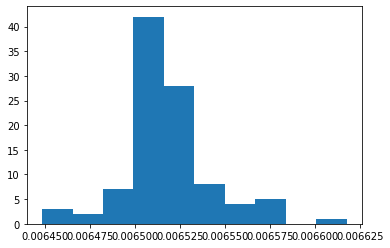

In [160]:
plt.hist(Demo_list)
plt.show()

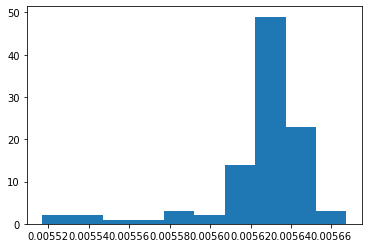

In [161]:
plt.hist(Repub_list)
plt.show()

## Exercise 6

In [194]:
def getfraction(Graph,name):
    neighbors=list(Graph.neighbors(name))
    party=Graph.nodes[name]['party']
    count=0
    if len(neighbors) == 0:
        return 0
    for n in neighbors:
        if Graph.nodes[n]['party'] == party:
            count+=1
    return count/len(neighbors)

In [195]:
fraction=[]
for name in list(G.nodes):
    fraction.append(getfraction(G,name))
sum(fraction)/len(fraction)

0.6052936668430462

In [198]:
shuffle_fraction=[]
for name in list(G_shuffled.nodes):
    shuffle_fraction.append(getfraction(G_shuffled,name))
sum(shuffle_fraction)/len(shuffle_fraction)

0.6257424712445443

In [199]:
res=[]
for i in range(100):
    if i % 10 ==0:
        print(i)
    R = G_non.copy()
    G_shuffled=nx.double_edge_swap(R, nswap=1, max_tries=len(list(G.edges)))
    shuffle_fraction=[]
    for name in list(G_shuffled.nodes):
        shuffle_fraction.append(getfraction(G_shuffled,name))
    res.append(sum(shuffle_fraction)/len(shuffle_fraction))

0
10
20
30
40
50
60
70
80
90


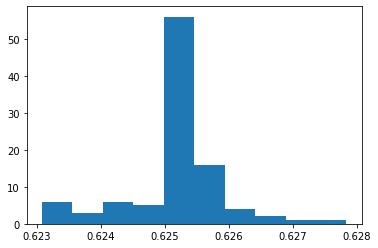

In [200]:
plt.hist(res)
plt.show()

In [201]:
nx.attribute_assortativity_coefficient(G,'party')

0.27245027937463545